- Author: Peter Riesebos
- Purpose: Script used to inspect various metrics of the imported VCF files and output stat files, overlap, etc..
- Input: imputed vcf file, output stats file of the vcf, and an output stats with added regions column
- Output: graphs

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

print("imports done.")

imports done.


In [2]:
info = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/output.txt.gz", header=None, sep=';', names=["CHROM", "POS", "AF", "MAF", "R2", "TYPE", "ETC"])

In [3]:
info_unfiltered = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/unfiltered_output.txt.gz", header=None, sep=';', names=["CHROM", "POS", "AF", "MAF", "R2", "TYPE", "ETC"])

/tmp/ipykernel_939847/3826114554.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  info_unfiltered = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/unfiltered_output.txt.gz", header=None, sep=';', names=["CHROM", "POS", "AF", "MAF", "R2", "TYPE", "ETC"])


In [4]:
regions = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/output_stats_regions.tsv.gz", sep='\s+')

/tmp/ipykernel_939847/317452020.py:1: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  regions = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/output_stats_regions.tsv.gz", sep='\s+')


In [39]:
exp = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/expression_samples.txt", sep="\s+", names=['samples'])

In [25]:
exp_t = exp.T

In [20]:
samples = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/gte_file.tsv", sep="\s+", header=None, names=['sample1', 'sample2', 'study'])

In [27]:
sample = samples['sample1']

In [31]:
exp_t

""
007234a0-be80-4e10-bb32-ee26dbbbf853
28272b35-6498-4363-8b1c-e16b15b4a6c9
4458fdd7-2843-4b4f-ba0c-98b1eaf86079
46419127-7594-43d3-b4ea-4c7d39e0ef60
617478c8-4a5d-4330-be34-6f19cb65c0c5
...
SRR9608286
SRR9608287
SRR9608288
SRR9608289


In [5]:
info.head()

,CHROM,POS,AF,MAF,R2,TYPE,ETC
0,1,16949,AF=0.18997,MAF=0.18997,R2=0.32136,IMPUTED,NaN
1,1,17020,AF=0.10545,MAF=0.10545,R2=0.50174,IMPUTED,NaN
2,1,17385,AF=0.09251,MAF=0.09251,R2=0.95926,ER2=0.00405,TYPED
3,1,17407,AF=0.01106,MAF=0.01106,R2=0.92063,ER2=0.00476,TYPED
4,1,17408,AF=0.04791,MAF=0.04791,R2=0.33426,IMPUTED,NaN


In [6]:
info_unfiltered.head()

,CHROM,POS,AF,MAF,R2,TYPE,ETC
0,1,10390,AF=0.00695,MAF=0.00695,R2=0.01001,IMPUTED,NaN
1,1,10397,AF=0.0019,MAF=0.0019,R2=0.04253,IMPUTED,NaN
2,1,10397,AF=0.00092,MAF=0.00092,R2=0.02612,IMPUTED,NaN
3,1,10397,AF=0.00638,MAF=0.00638,R2=0.03236,IMPUTED,NaN
4,1,10403,AF=0.00152,MAF=0.00152,R2=0.00181,IMPUTED,NaN


In [7]:
regions.head()

,var_id,is_indel,sample_size,nr_aa,nr_ab,nr_bb,maf,hwe,missing,gt_total,maf_type,gq,ref_freq,alt_freq,gene_types,transcripts,exons,var_status
0,1:16949:A_C,0,194,157,37,0,0.095361,0.226233,0,194,ALT,PASS,0.904639,0.095361,protein_coding,ENST00000614336.4:ENST00000612640.4,intronic,NaN
1,1:17020:G_A,0,194,160,34,0,0.087629,0.369540,0,194,ALT,PASS,0.912371,0.087629,protein_coding,ENST00000614336.4:ENST00000612640.4,intronic,NaN
2,1:17385:G_A,0,194,159,35,0,0.090206,0.373018,0,194,ALT,PASS,0.909794,0.090206,protein_coding:protein_coding,ENST00000614336.4:ENST00000612640.4:ENST000006...,ENSE00002298587.2,exonic
3,1:17407:G_A,0,194,190,4,0,0.010309,1.000000,0,194,ALT,PASS,0.989691,0.010309,protein_coding:protein_coding,ENST00000614336.4:ENST00000612640.4:ENST000006...,ENSE00002298587.2,exonic
4,1:17408:C_G,0,194,186,8,0,0.020619,1.000000,0,194,ALT,PASS,0.979381,0.020619,protein_coding:protein_coding,ENST00000614336.4:ENST00000612640.4:ENST000006...,ENSE00002298587.2,exonic


In [42]:
# Read the two text files into DataFrames
df_genes_exp = pd.read_csv('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/gene_ids_exp.txt', header=None, names=['gene_id'])
df_genes_gtf = pd.read_csv('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/gene_ids_gtf.txt', header=None, names=['gene_id'])
df_genes_star = pd.read_csv('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/gene_ids_star.txt', header=None, names=['gene_id'])
df_genes_ensembl = pd.read_csv('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/6-imputatie/output/postimpute/gene_ids_ensembl.txt', header=None, names=['gene_id'])

print('expression file genes:', len(df_genes_exp),', gencode44b38 genes', len(df_genes_gtf))

common_genes = df_genes_exp['gene_id'].isin(df_genes_gtf['gene_id']).sum()
total_genes_exp = len(df_genes_exp)
percentage = (common_genes / total_genes_exp) * 100

print(f"{percentage:.2f}% of genes in df_genes_exp are also in df_genes_gtf")

common_genes = df_genes_exp['gene_id'].isin(df_genes_star['gene_id']).sum()
percentage = (common_genes / total_genes_exp) * 100

print(f"{percentage:.2f}% of genes in df_genes_exp are also in df_genes_star")

common_genes = df_genes_star['gene_id'].isin(df_genes_gtf['gene_id']).sum()
total_genes_star = len(df_genes_star)
percentage = (common_genes / total_genes_star) * 100

print(f"{percentage:.2f}% of genes in df_genes_star are also in df_genes_gtf")

common_genes = df_genes_exp['gene_id'].isin(df_genes_ensembl['gene_id']).sum()
percentage = (common_genes / total_genes_exp) * 100

print(f"{percentage:.2f}% of genes in df_genes_exp are also in df_genes_ensembl")

expression file genes: 28942 , gencode44b38 genes 3424767
34.82% of genes in df_genes_exp are also in df_genes_gtf
34.82% of genes in df_genes_exp are also in df_genes_star
100.00% of genes in df_genes_star are also in df_genes_gtf
92.91% of genes in df_genes_exp are also in df_genes_ensembl


In [47]:
df_genes_exp['gene_id'] = df_genes_exp['gene_id'].str.replace(r'\.\d+$', '', regex=True)
df_genes_gtf['gene_id'] = df_genes_gtf['gene_id'].str.replace(r'\.\d+$', '', regex=True)

common_genes = df_genes_exp['gene_id'].isin(df_genes_gtf['gene_id']).sum()
total_genes_exp = len(df_genes_exp)
percentage = (common_genes / total_genes_exp) * 100

print(f"{percentage:.2f}% of genes in df_genes_exp are also in df_genes_ensembl (without version)")

98.71% of genes in df_genes_exp are also in df_genes_ensembl (without version)


In [29]:
df = info.copy()  # create a copy of the dataframe

# Remove 'AF=', 'MAF=' and 'R2=' from the 'AF', 'MAF' and 'R2' columns
df['AF'] = df['AF'].str.replace('AF=', '')
df['MAF'] = df['MAF'].str.replace('MAF=', '')
df['R2'] = df['R2'].str.replace('R2=', '')

In [9]:
df2 = info_unfiltered.copy()  # create a copy of the dataframe

# Remove 'AF=', 'MAF=' and 'R2=' from the 'AF', 'MAF' and 'R2' columns
df2['AF'] = df2['AF'].str.replace('AF=', '')
df2['MAF'] = df2['MAF'].str.replace('MAF=', '')
df2['R2'] = df2['R2'].str.replace('R2=', '')

In [10]:
df.tail()

,CHROM,POS,AF,MAF,R2,TYPE,ETC
2355944,22,50797585,0.16649,0.16649,0.31355,IMPUTED,NaN
2355945,22,50798021,0.06838,0.06838,0.62017,IMPUTED,NaN
2355946,22,50798635,0.20533,0.20533,0.42255,IMPUTED,NaN
2355947,22,50799821,0.07985,0.07985,0.53828,IMPUTED,NaN
2355948,22,50802428,0.02055,0.02055,0.41374,IMPUTED,NaN


In [11]:
df2.tail()

,CHROM,POS,AF,MAF,R2,TYPE,ETC
51068855,22,50807836,0.00057,0.00057,0.00109,IMPUTED,NaN
51068856,22,50807841,0.00045,0.00045,0.00052,IMPUTED,NaN
51068857,22,50807850,0.0023,0.0023,0.02115,IMPUTED,NaN
51068858,22,50807850,0.00019,0.00019,0.00037,IMPUTED,NaN
51068859,22,50808014,0.00217,0.00217,0.09248,IMPUTED,NaN


In [12]:
chrom_counts = info.CHROM.value_counts().sort_values(ascending=False)

In [13]:
chrom_counts

CHROM
1     229882
2     177049
6     176810
3     151127
7     130470
11    129565
12    127200
5     123767
19    121934
4     121109
17    111993
10    109674
9      90589
8      90569
16     88944
14     82818
15     74544
20     57731
22     51698
13     46875
18     36808
21     24793
Name: count, dtype: int64

In [14]:
test_df = df[['CHROM','MAF', 'R2']]
test_df = test_df.astype({'MAF': float})
test_df = test_df.astype({'R2': float})
test_df.dtypes

CHROM      int64
MAF      float64
R2       float64
dtype: object

In [15]:
test_df2 = df2[['CHROM','MAF', 'R2']]
test_df2 = test_df2.astype({'MAF': float})
test_df2 = test_df2.astype({'R2': float})
test_df2.dtypes

CHROM      int64
MAF      float64
R2       float64
dtype: object

In [16]:
test_df

,CHROM,MAF,R2
0,1,0.18997,0.32136
1,1,0.10545,0.50174
2,1,0.09251,0.95926
3,1,0.01106,0.92063
4,1,0.04791,0.33426
...,...,...,...
2355944,22,0.16649,0.31355
2355945,22,0.06838,0.62017
2355946,22,0.20533,0.42255
2355947,22,0.07985,0.53828


In [17]:
test_df2

,CHROM,MAF,R2
0,1,0.00695,0.01001
1,1,0.00190,0.04253
2,1,0.00092,0.02612
3,1,0.00638,0.03236
4,1,0.00152,0.00181
...,...,...,...
51068855,22,0.00057,0.00109
51068856,22,0.00045,0.00052
51068857,22,0.00230,0.02115
51068858,22,0.00019,0.00037


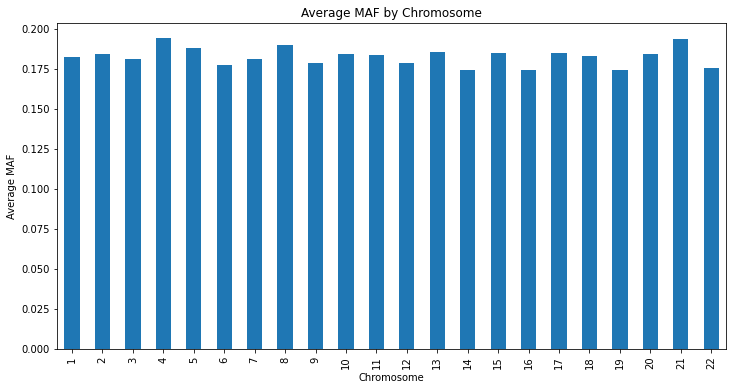

In [18]:
# group by CHROM and calculate mean MAF for each group
chrom_maf_means = test_df.groupby('CHROM')['MAF'].mean()

# plot the results
plt.figure(figsize=(12, 6))
chrom_maf_means.plot(kind='bar')
plt.xlabel('Chromosome')
plt.ylabel('Average MAF')
plt.title('Average MAF by Chromosome')
plt.show()

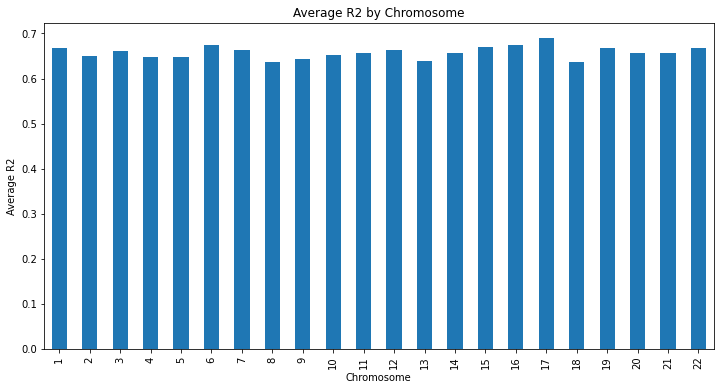

In [19]:
# group by CHROM and calculate mean MAF for each group
chrom_maf_means = test_df.groupby('CHROM')['R2'].mean()

# plot the results
plt.figure(figsize=(12, 6))
chrom_maf_means.plot(kind='bar')
plt.xlabel('Chromosome')
plt.ylabel('Average R2')
plt.title('Average R2 by Chromosome')
plt.show()

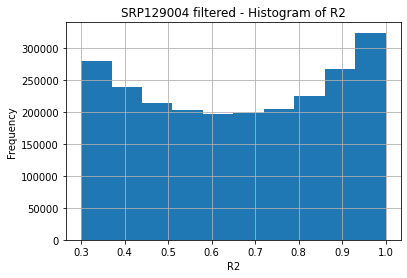

In [20]:
plt.figure(facecolor='white')
test_df['R2'].hist(bins=10)
plt.xlabel('R2')
plt.ylabel('Frequency')
plt.title('SRP129004 filtered - Histogram of R2')
plt.show()

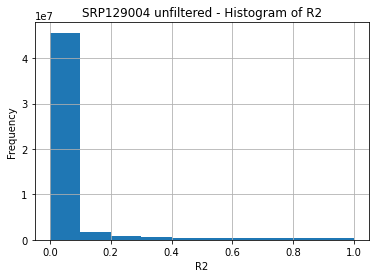

In [21]:
plt.figure(facecolor='white')
test_df2['R2'].hist(bins=10)
plt.xlabel('R2')
plt.ylabel('Frequency')
plt.title('SRP129004 unfiltered - Histogram of R2')
plt.show()

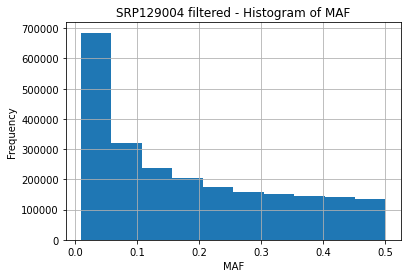

In [22]:
plt.figure(facecolor='white')
test_df['MAF'].hist(bins=10)
plt.xlabel('MAF')
plt.ylabel('Frequency')
plt.title('SRP129004 filtered - Histogram of MAF')
plt.show()

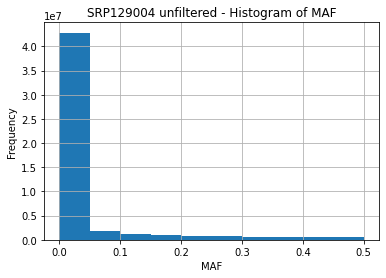

In [23]:
plt.figure(facecolor='white')
test_df2['MAF'].hist(bins=10)
plt.xlabel('MAF')
plt.ylabel('Frequency')
plt.title('SRP129004 unfiltered - Histogram of MAF')
plt.show()

In [24]:
regions['exons'].value_counts()

exons
intronic                                                                                     1308
ENSE00003720743.1                                                                              47
ENSE00003744980.1:ENSE00003744980.1                                                            39
ENSE00003741744.1                                                                              28
ENSE00003714233.1                                                                              25
                                                                                             ... 
ENSE00003733844.1:ENSE00003733844.1                                                             1
ENSE00003712199.1                                                                               1
ENSE00003730962.1                                                                               1
ENSE00003752707.1:ENSE00003718954.1:ENSE00003741299.1:ENSE00003751415.1:ENSE00003751415.1       1
ENSE0000371220

In [25]:
regions['var_status'].value_counts()

var_status
exonic    574
Name: count, dtype: int64

In [26]:
regions['gene_types'].value_counts()

gene_types
protein_coding                                                       815
protein_coding:protein_coding                                        674
protein_coding:protein_coding:protein_coding                         254
pseudogene                                                            31
protein_coding:protein_coding:protein_coding:protein_coding           29
protein_coding:protein_coding:processed_pseudogene:protein_coding     13
protein_coding:pseudogene                                             11
processed_pseudogene                                                  10
rRNA                                                                  10
protein_coding:rRNA                                                    9
snRNA                                                                  4
protein_coding:protein_coding:processed_pseudogene                     3
protein_coding:misc_RNA                                                3
protein_coding:protein_coding:protein_co